# Importing the needed lib and packages 

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import pyodbc

## Define the connection string for SQLAlchemy

In [2]:
connection_string = 'mssql+pyodbc://DESKTOP-T4KINTS\SQLEXPRESS/Trafficuk?driver=SQL+Server'

# Create an SQLAlchemy engine
engine = create_engine(connection_string)

# Function to fetch data from a table and convert it to a Pandas DataFrame
def fetch_data(query, table_name):
    print(f"Fetching data from {table_name}...")
    return pd.read_sql(query, engine)

## Queries to fetch data from each table


In [3]:
queries = {
    'Accidents': """
        SELECT [Accident_Index], [Location_Easting_OSGR], [Location_Northing_OSGR],
               [Longitude], [Latitude], [Police_Force], [Accident_Severity],
               [Number_of_Vehicles], [Number_of_Casualties], [Date], [Day_of_Week],
               [Time], [Year], [Did_Police_Officer_Attend_Scene_of_Accident],
               [Road_ID], [Condition_ID]
        FROM [Trafficuk].[dbo].[Accidents]
    """,
    'Roads': """
        SELECT [Road_ID], [First_Road_Class], [First_Road_Number], [Road_Type],
               [Speed_limit], [Junction_Control], [Second_Road_Class], [Second_Road_Number]
        FROM [Trafficuk].[dbo].[Roads]
    """,
    'Conditions': """
        SELECT [Condition_ID], [Pedestrian_Crossing_Human_Control],
               [Pedestrian_Crossing_Physical_Facilities], [Light_Conditions],
               [Weather_Conditions], [Road_Surface_Conditions],
               [Special_Conditions_at_Site], [Carriageway_Hazards], [Urban_or_Rural_Area]
        FROM [Trafficuk].[dbo].[Conditions]
    """,
    'Authorities': """
        SELECT [Authority_ID], [Local_Authority_District], [Local_Authority_Highway]
        FROM [Trafficuk].[dbo].[Authorities]
    """,
    'Accident_Authority':"""
         SELECT  [Accident_Index] ,[Authority_ID]
         FROM [Trafficuk].[dbo].[Accident_Authority]
    """
}

In [4]:
# Fetch and preprocess data from each table
accidents_df = fetch_data(queries['Accidents'], 'Accidents')
roads_df = fetch_data(queries['Roads'], 'Roads')
conditions_df = fetch_data(queries['Conditions'], 'Conditions')
authorities_df = fetch_data(queries['Authorities'], 'Authorities')
auth_acc_df = fetch_data(queries['Accident_Authority'],'Accident_Authority')

Fetching data from Accidents...
Fetching data from Roads...
Fetching data from Conditions...
Fetching data from Authorities...
Fetching data from Accident_Authority...


In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure


## Preprocessing Tables 

In [6]:
def preprocess_accidents(accidents_df):
    # 1. Fill missing values with a placeholder
    accidents_df.fillna('Unknown', inplace=True)
    
    # 2. Create a new feature for the hour of the accident from the 'Time' column
    accidents_df['Hour_of_Accident'] = pd.to_datetime(accidents_df['Time'], errors='coerce').dt.hour
    
    # 3. Convert categorical columns to category type
    categorical_columns = ['Police_Force', 'Accident_Severity', 'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident']
    for col in categorical_columns:
        accidents_df[col] = accidents_df[col].astype('category')
        
    return accidents_df

# Fetch and preprocess
accidents_df = fetch_data(queries['Accidents'], 'Accidents')
preprocessed_accidents = preprocess_accidents(accidents_df)
print(preprocessed_accidents.head())


Fetching data from Accidents...
   Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0               1                 525680                  178240  -0.191170   
1               2                 530060                  175070  -0.129284   
2               3                 520100                  180620  -0.270692   
3               4                 337180                  393210  -2.947008   
4               5                 523310                  180110  -0.224636   

    Latitude Police_Force Accident_Severity  Number_of_Vehicles  \
0  51.489098            1                 2                   1   
1  51.459618            1                 3                   1   
2  51.511700            1                 3                   1   
3  53.431908            5                 3                   1   
4  51.506424            1                 3                   1   

   Number_of_Casualties        Date Day_of_Week              Time  Year  \
0              

In [7]:
def preprocess_roads(roads_df):
    # 1. Fill missing values with a placeholder
    roads_df.fillna('Unknown', inplace=True)
    
    # 2. Convert categorical columns to category type
    categorical_columns = ['First_Road_Class', 'Road_Type', 'Junction_Control', 'Second_Road_Class']
    for col in categorical_columns:
        roads_df[col] = roads_df[col].astype('category')
    
    return roads_df

# Fetch and preprocess
roads_df = fetch_data(queries['Roads'], 'Roads')
preprocessed_roads = preprocess_roads(roads_df)
print(preprocessed_roads.head())


Fetching data from Roads...
   Road_ID First_Road_Class  First_Road_Number           Road_Type  \
0        1                4                450    Dual carriageway   
1        2                5                  0  Single carriageway   
2        3                3               3212  Single carriageway   
3        4                4                450  Single carriageway   
4        5                3                  4  Single carriageway   

   Speed_limit          Junction_Control Second_Road_Class  Second_Road_Number  
0           30  Automatic traffic signal                 5                   0  
1           30   Giveway or uncontrolled                 6                   0  
2           30  Automatic traffic signal                 4                 304  
3           30   Giveway or uncontrolled                 5                   0  
4           30  Automatic traffic signal                 4                 325  


In [8]:
def preprocess_conditions(conditions_df):
    # 1. Fill missing values with a placeholder
    conditions_df.fillna('Unknown', inplace=True)
    
    # 2. Convert categorical columns to category type
    categorical_columns = ['Pedestrian_Crossing_Human_Control', 'Pedestrian_Crossing_Physical_Facilities', 
                           'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
                           'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Urban_or_Rural_Area']
    for col in categorical_columns:
        conditions_df[col] = conditions_df[col].astype('category')
    
    return conditions_df

# Fetch and preprocess
conditions_df = fetch_data(queries['Conditions'], 'Conditions')
preprocessed_conditions = preprocess_conditions(conditions_df)
print(preprocessed_conditions.head())


Fetching data from Conditions...
   Condition_ID Pedestrian_Crossing_Human_Control  \
0             1             None within 50 metres   
1             2             None within 50 metres   
2             3             None within 50 metres   
3             4             None within 50 metres   
4             5             None within 50 metres   

       Pedestrian_Crossing_Physical_Facilities  \
0                               Zebra crossing   
1  Pedestrian phase at traffic signal junction   
2        No physical crossing within 50 meters   
3        No physical crossing within 50 meters   
4        No physical crossing within 50 meters   

                          Light_Conditions          Weather_Conditions  \
0           Daylight: Street light present  Raining without high winds   
1  Darkness: Street lights present and lit     Fine without high winds   
2  Darkness: Street lights present and lit     Fine without high winds   
3           Daylight: Street light present     Fine

In [9]:
def preprocess_authorities(authorities_df):
    # 1. Fill missing values with a placeholder
    authorities_df.fillna('Unknown', inplace=True)
    
    # 2. Convert categorical columns to category type
    categorical_columns = ['Local_Authority_District', 'Local_Authority_Highway']
    for col in categorical_columns:
        authorities_df[col] = authorities_df[col].astype('category')
    
    return authorities_df

# Fetch and preprocess
authorities_df = fetch_data(queries['Authorities'], 'Authorities')
preprocessed_authorities = preprocess_authorities(authorities_df)
print(preprocessed_authorities.head())


Fetching data from Authorities...
   Authority_ID Local_Authority_District Local_Authority_Highway
0             1                       12               E09000020
1             2                       12               E09000020
2             3                       12               E09000020
3             4                       12               E09000020
4             5                       12               E09000020


## Visualization 

### TABLE 1: Accidents

In [10]:
import folium

def plot_map(df, lat_col='Latitude', lon_col='Longitude'):
    # Create a base map
    m = folium.Map(location=[df[lat_col].mean(), df[lon_col].mean()], zoom_start=10)

    # Add points to the map
    for _, row in df.iterrows():
        folium.CircleMarker(
            location=(row[lat_col], row[lon_col]),
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"Accident Index: {row['Accident_Index']}"  # Assuming there's an Accident_Index
        ).add_to(m)

    return m

# Plotting accidents on the map
accidents_map = plot_map(preprocessed_accidents)
accidents_map.save('accidents_map.html')  # Save the map to an HTML file


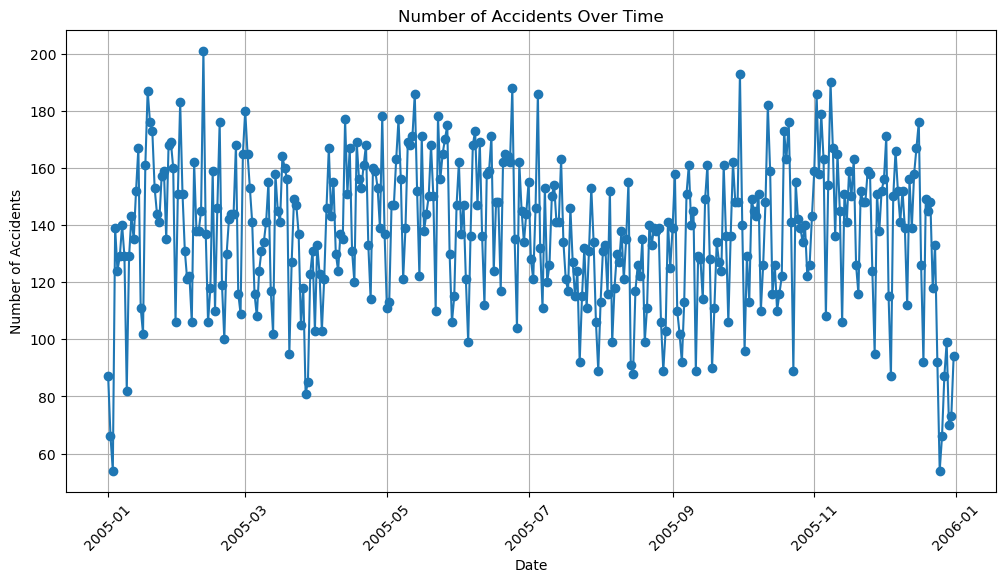

In [11]:
import matplotlib.pyplot as plt

def plot_time_series(df):
    # Convert 'Date' to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    time_series_data = df.groupby(df['Date'].dt.date).size()
    
    plt.figure(figsize=(12, 6))
    plt.plot(time_series_data.index, time_series_data.values, marker='o')
    plt.title('Number of Accidents Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

plot_time_series(preprocessed_accidents)


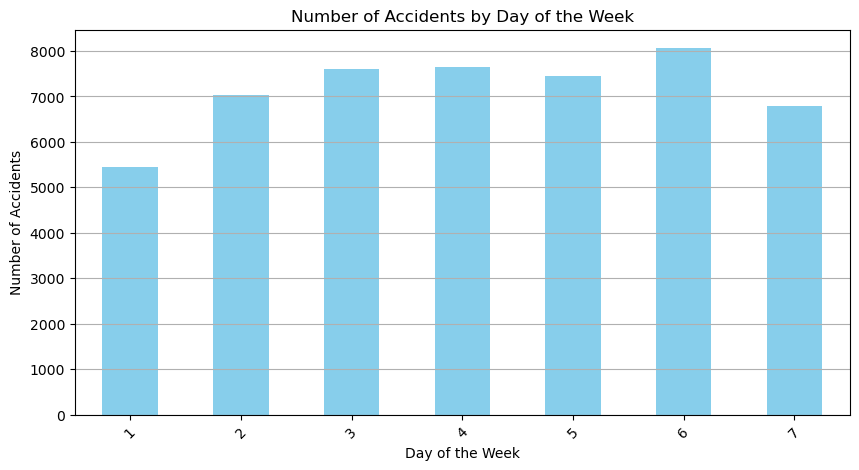

In [12]:
def plot_accidents_by_day(df):
    day_counts = df['Day_of_Week'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 5))
    day_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Accidents by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_accidents_by_day(preprocessed_accidents)


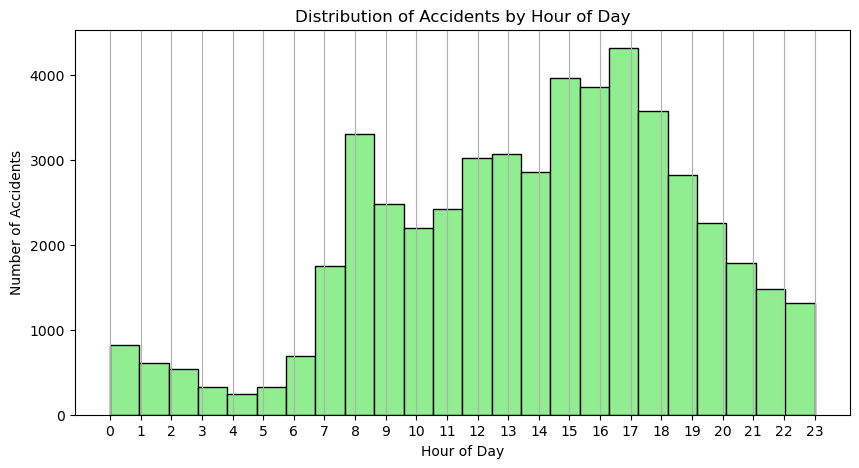

In [13]:
def plot_hour_histogram(df):
    plt.figure(figsize=(10, 5))
    df['Hour_of_Accident'].hist(bins=24, color='lightgreen', edgecolor='black')
    plt.title('Distribution of Accidents by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Accidents')
    plt.xticks(range(24))
    plt.grid(axis='y')
    plt.show()

plot_hour_histogram(preprocessed_accidents)


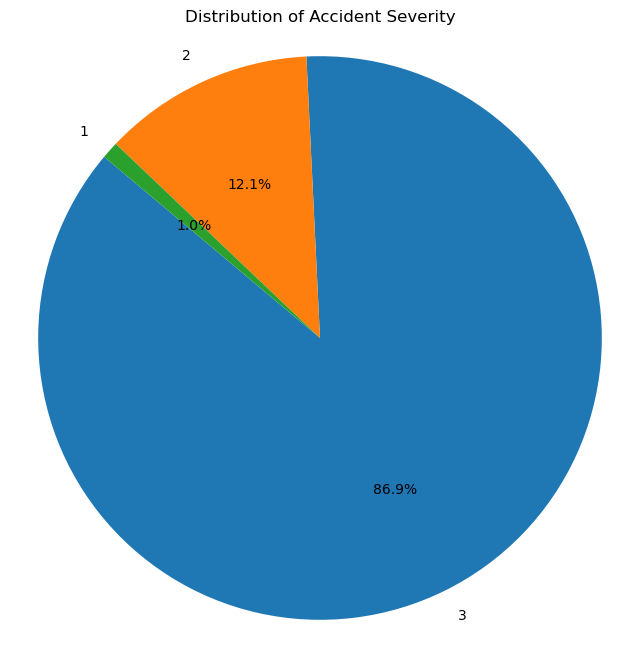

In [14]:
def plot_accident_severity(df):
    severity_counts = df['Accident_Severity'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Accident Severity')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
    plt.show()

plot_accident_severity(preprocessed_accidents)


<Figure size 1200x600 with 0 Axes>

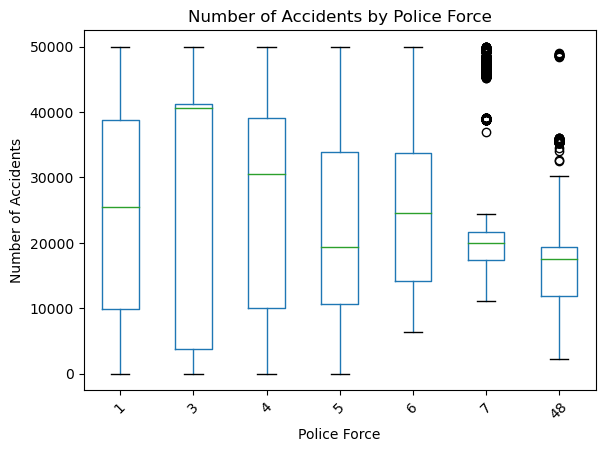

In [15]:
def plot_boxplot_by_police_force(df):
    plt.figure(figsize=(12, 6))
    df.boxplot(column='Accident_Index', by='Police_Force', grid=False)
    plt.title('Number of Accidents by Police Force')
    plt.suptitle('')
    plt.xlabel('Police Force')
    plt.ylabel('Number of Accidents')
    plt.xticks(rotation=45)
    plt.show()

plot_boxplot_by_police_force(preprocessed_accidents)


### TABLE 2: Roads

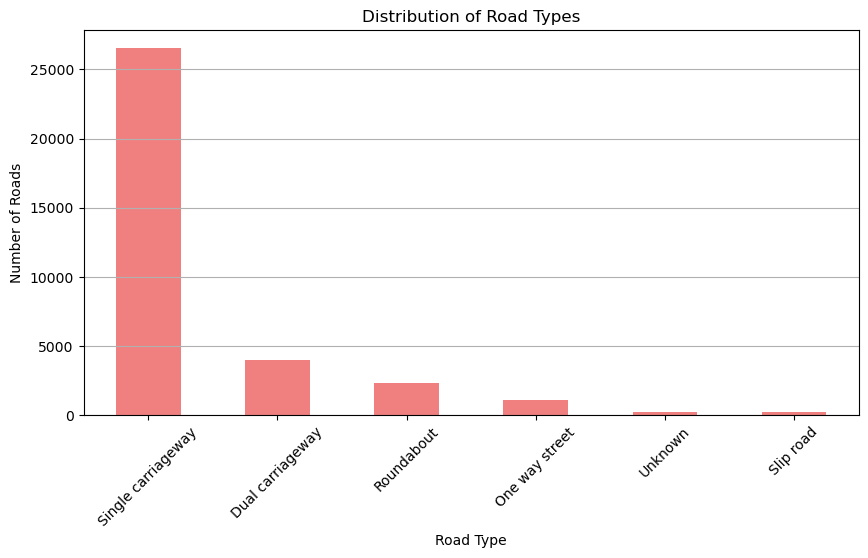

In [16]:
import matplotlib.pyplot as plt

def plot_road_types(df):
    road_type_counts = df['Road_Type'].value_counts()
    
    plt.figure(figsize=(10, 5))
    road_type_counts.plot(kind='bar', color='lightcoral')
    plt.title('Distribution of Road Types')
    plt.xlabel('Road Type')
    plt.ylabel('Number of Roads')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_road_types(preprocessed_roads)


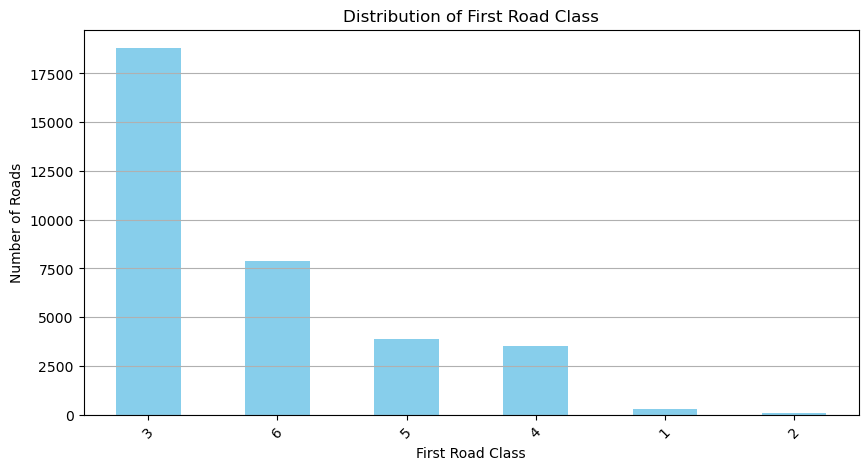

In [17]:
def plot_first_road_class(df):
    first_road_class_counts = df['First_Road_Class'].value_counts()
    
    plt.figure(figsize=(10, 5))
    first_road_class_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of First Road Class')
    plt.xlabel('First Road Class')
    plt.ylabel('Number of Roads')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_first_road_class(preprocessed_roads)


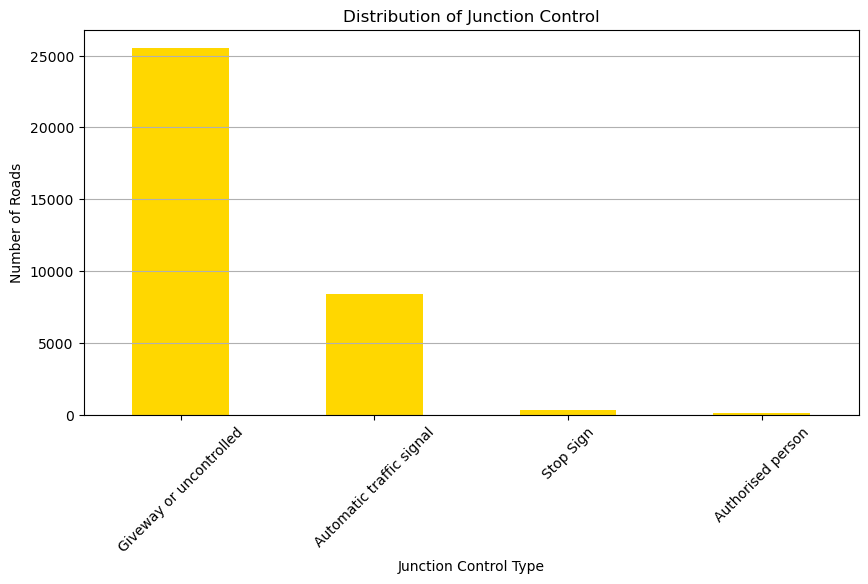

In [18]:
def plot_junction_control(df):
    junction_control_counts = df['Junction_Control'].value_counts()
    
    plt.figure(figsize=(10, 5))
    junction_control_counts.plot(kind='bar', color='gold')
    plt.title('Distribution of Junction Control')
    plt.xlabel('Junction Control Type')
    plt.ylabel('Number of Roads')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_junction_control(preprocessed_roads)


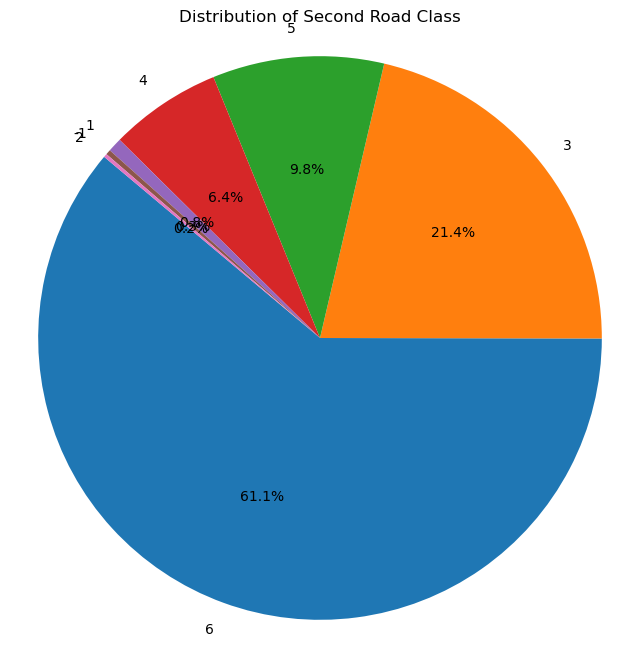

In [19]:
def plot_second_road_class(df):
    second_road_class_counts = df['Second_Road_Class'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(second_road_class_counts, labels=second_road_class_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Second Road Class')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
    plt.show()

plot_second_road_class(preprocessed_roads)


### TABLE 3: Conditions

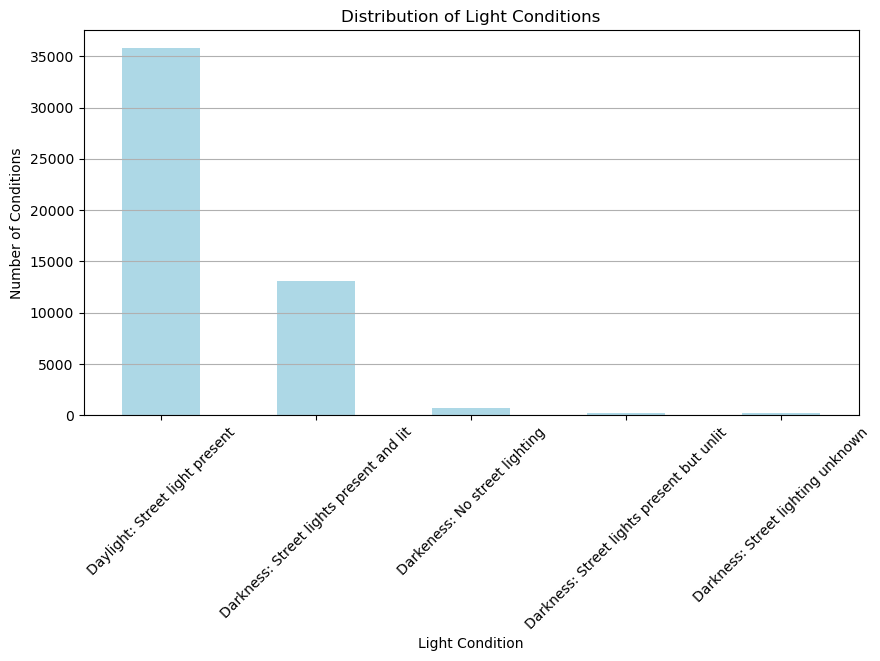

In [20]:
import matplotlib.pyplot as plt

def plot_light_conditions(df):
    light_condition_counts = df['Light_Conditions'].value_counts()
    
    plt.figure(figsize=(10, 5))
    light_condition_counts.plot(kind='bar', color='lightblue')
    plt.title('Distribution of Light Conditions')
    plt.xlabel('Light Condition')
    plt.ylabel('Number of Conditions')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_light_conditions(preprocessed_conditions)


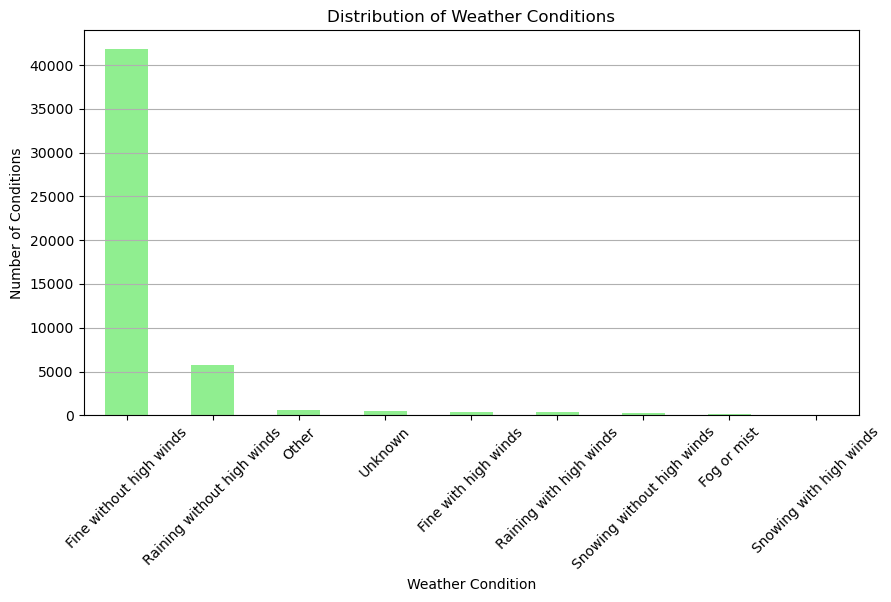

In [21]:
def plot_weather_conditions(df):
    weather_condition_counts = df['Weather_Conditions'].value_counts()
    
    plt.figure(figsize=(10, 5))
    weather_condition_counts.plot(kind='bar', color='lightgreen')
    plt.title('Distribution of Weather Conditions')
    plt.xlabel('Weather Condition')
    plt.ylabel('Number of Conditions')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_weather_conditions(preprocessed_conditions)


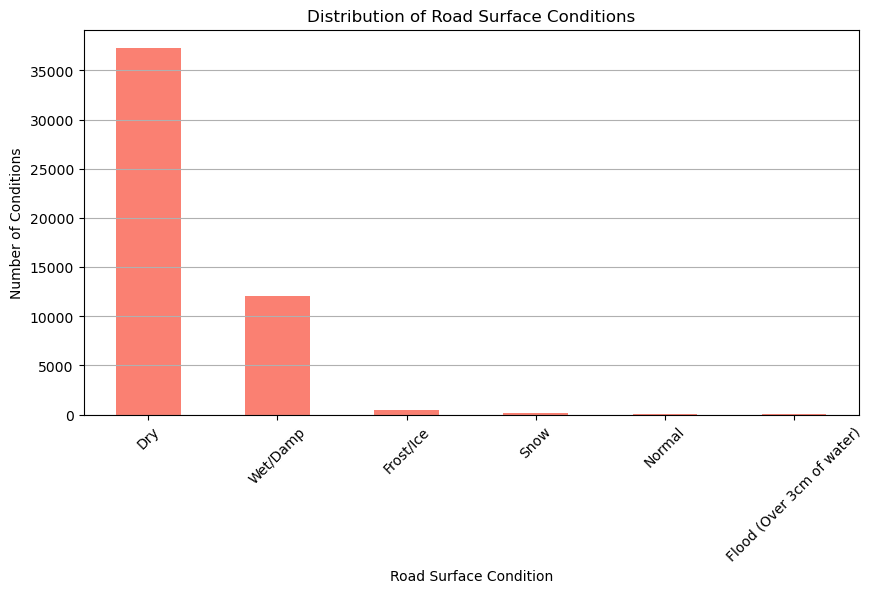

In [22]:
def plot_road_surface_conditions(df):
    surface_condition_counts = df['Road_Surface_Conditions'].value_counts()
    
    plt.figure(figsize=(10, 5))
    surface_condition_counts.plot(kind='bar', color='salmon')
    plt.title('Distribution of Road Surface Conditions')
    plt.xlabel('Road Surface Condition')
    plt.ylabel('Number of Conditions')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_road_surface_conditions(preprocessed_conditions)


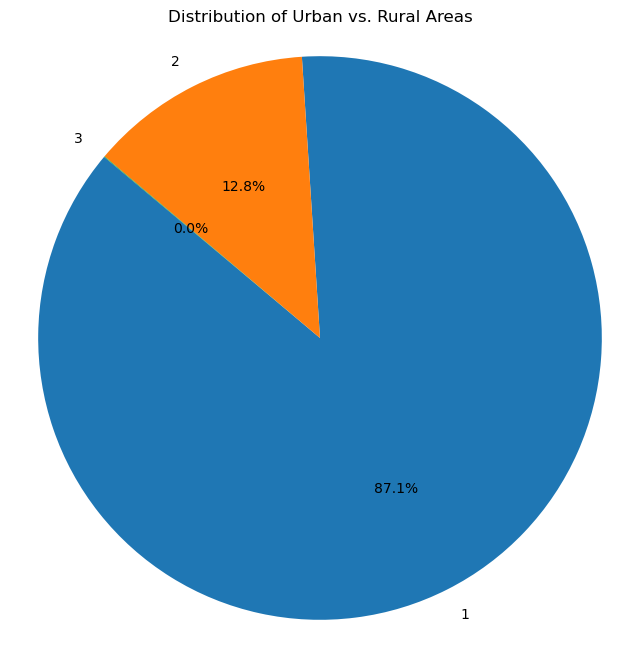

In [23]:
def plot_urban_rural_distribution(df):
    urban_rural_counts = df['Urban_or_Rural_Area'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(urban_rural_counts, labels=urban_rural_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Urban vs. Rural Areas')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
    plt.show()

plot_urban_rural_distribution(preprocessed_conditions)


### TABLE 4: Authorities

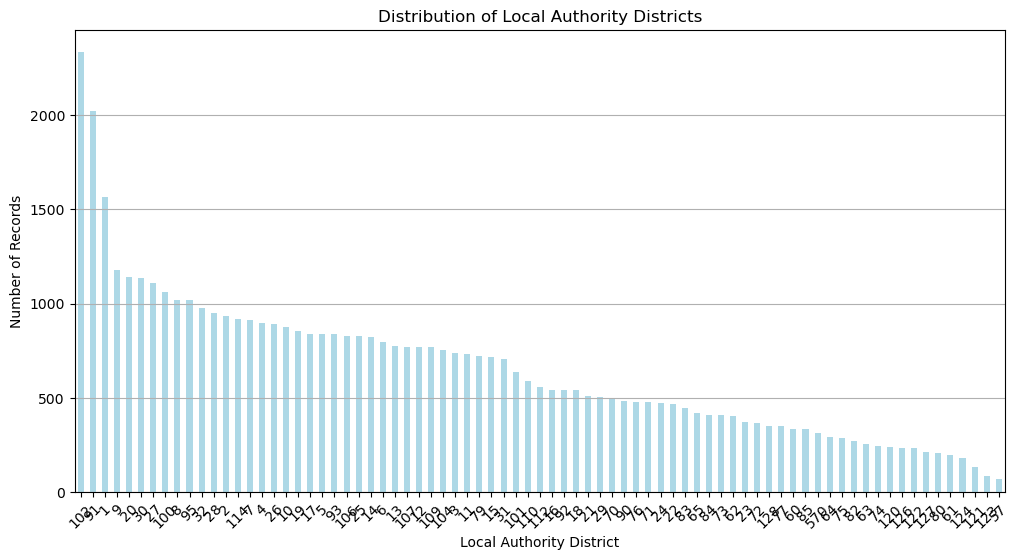

In [24]:
import matplotlib.pyplot as plt

def plot_local_authority_districts(df):
    district_counts = df['Local_Authority_District'].value_counts()
    
    plt.figure(figsize=(12, 6))
    district_counts.plot(kind='bar', color='lightblue')
    plt.title('Distribution of Local Authority Districts')
    plt.xlabel('Local Authority District')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_local_authority_districts(preprocessed_authorities)


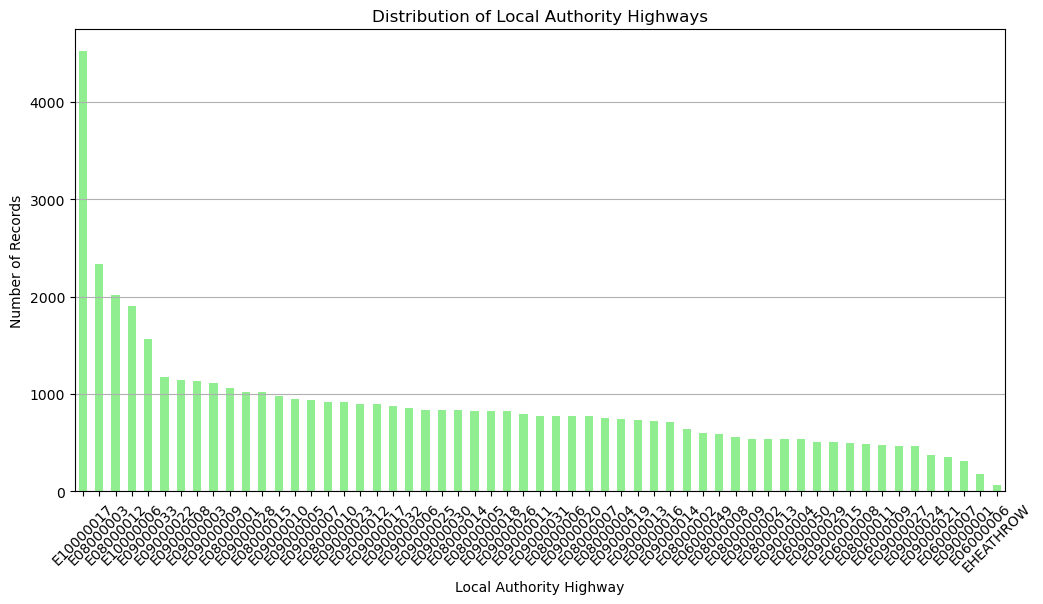

In [25]:
def plot_local_authority_highways(df):
    highway_counts = df['Local_Authority_Highway'].value_counts()
    
    plt.figure(figsize=(12, 6))
    highway_counts.plot(kind='bar', color='lightgreen')
    plt.title('Distribution of Local Authority Highways')
    plt.xlabel('Local Authority Highway')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

plot_local_authority_highways(preprocessed_authorities)


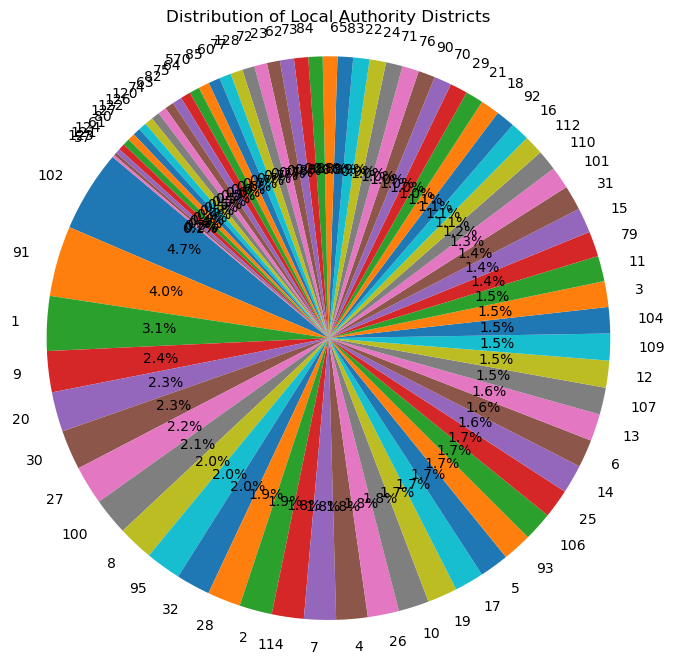

In [26]:
def plot_districts_pie_chart(df):
    district_counts = df['Local_Authority_District'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(district_counts, labels=district_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Local Authority Districts')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
    plt.show()

plot_districts_pie_chart(preprocessed_authorities)


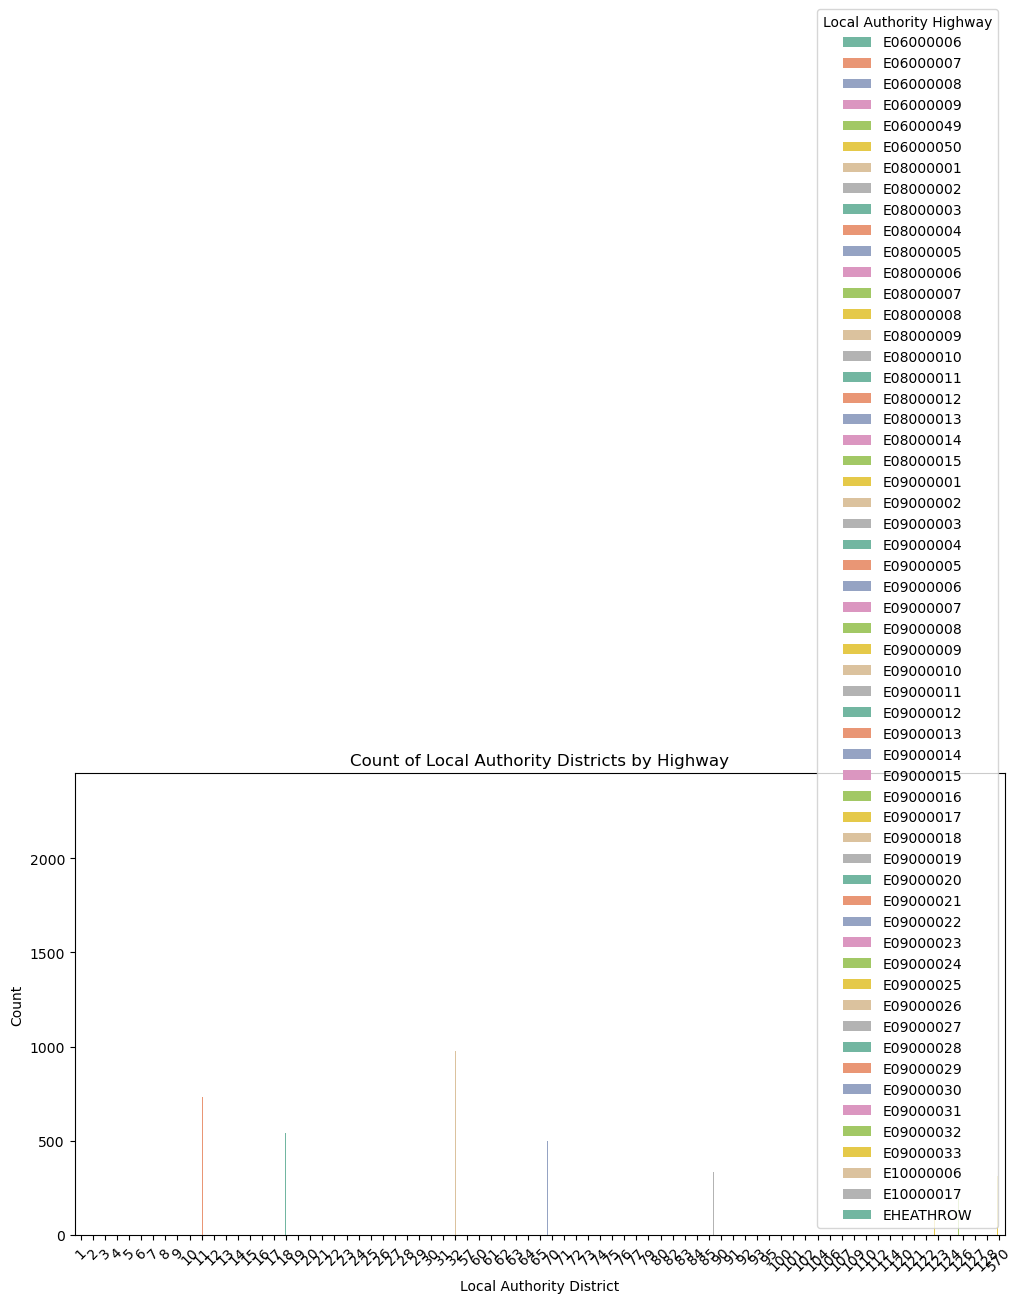

In [27]:
import seaborn as sns

def plot_count_authorities(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='Local_Authority_District', hue='Local_Authority_Highway', palette='Set2')
    plt.title('Count of Local Authority Districts by Highway')
    plt.xlabel('Local Authority District')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Local Authority Highway')
    plt.show()

plot_count_authorities(preprocessed_authorities)


# Model Evaluation 

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Combine data
combined_df = accidents_df.merge(roads_df, on='Road_ID', how='left') \
                            .merge(conditions_df, on='Condition_ID', how='left') \
                            .merge(auth_acc_df, on='Accident_Index', how='left') \
                            .merge(authorities_df, on='Authority_ID', how='left')

# Prepare feature and target variables
X = combined_df.drop(columns=['Accident_Index', 'Accident_Severity', 'Time', 'Date'])
y = combined_df['Accident_Severity'].astype('category').cat.codes  # Convert to numerical

# Encode categorical variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Count each type of severity in the predictions
severity_counts = pd.Series(y_pred).value_counts().sort_index()
print("Count of Each Accident Severity Type:\n", severity_counts)


Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.02        99
           1       0.33      0.03      0.06      1213
           2       0.87      0.99      0.93      8686

    accuracy                           0.87      9998
   macro avg       0.57      0.35      0.34      9998
weighted avg       0.80      0.87      0.81      9998

Confusion Matrix:
 [[   1    6   92]
 [   0   42 1171]
 [   1   79 8606]]
Count of Each Accident Severity Type:
 0       2
1     127
2    9869
dtype: int64


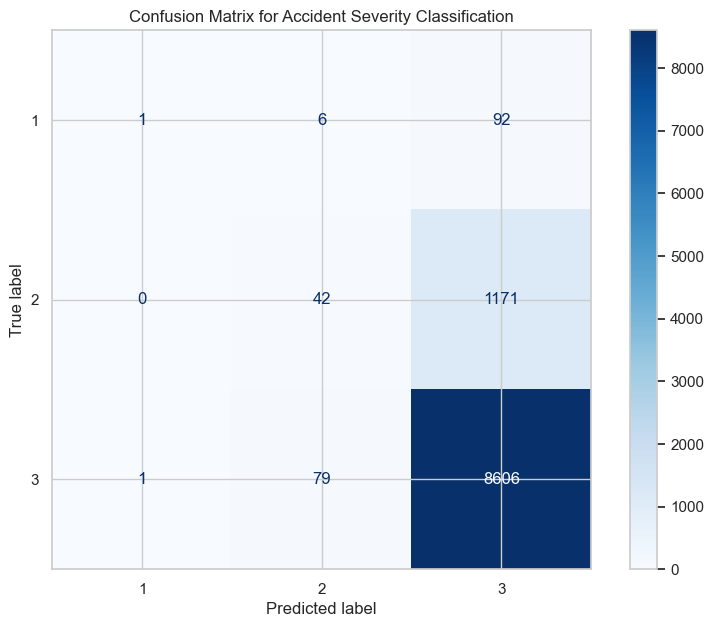

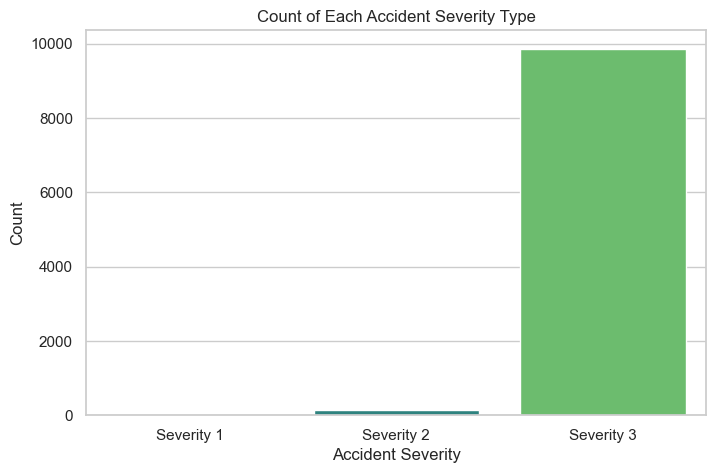

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Confusion Matrix
plt.figure(figsize=(10, 7))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[1, 2, 3]).plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Confusion Matrix for Accident Severity Classification')
plt.show()

# 2. Bar Plot of Accident Severity Counts
severity_counts = pd.Series(y_pred).value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="viridis")
plt.title('Count of Each Accident Severity Type')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Severity 1', 'Severity 2', 'Severity 3'])
plt.show()
